<a href="https://colab.research.google.com/github/faizanahemad/eva/blob/master/assignment-4/1st_CandidateArchitectures.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## **1st File: Candidate Architectures**
    - Receptive field of full image
    - Start with 16 vs 32 vs 64 (64 filters was a winner in assignment 3), We will test this by visualizing the 1st layer and checking if some kernels are dead kernels.
    - MaxPool vs 1x1 with stride=2
    - Stop at 4x4 or 5x5 or 6x6 or 7x7 or 9x9
    - 10 Epochs
    - Max Tried candidate architectures in this file = `2x4x4 = 32`
    - We will promote 8 or less architectures from here

In [0]:
!pip install --upgrade --upgrade-strategy only-if-needed https://github.com/faizanahemad/data-science-utils/tarball/master > /dev/null

In [2]:
import pandas as pd
import numpy as np
import time
import gc
import os
import sys
import dill
from matplotlib import pyplot as plt
from keras import backend as K
import numpy as np

from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, Flatten, Add
from keras.layers import Convolution2D, MaxPooling2D
import warnings
from data_science_utils.vision.keras import *
from keras.layers import Activation
warnings.filterwarnings("ignore")
%matplotlib inline

from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

Using TensorFlow backend.


In [3]:

X_train, Y_train, X_test, Y_test = get_mnist_data()
print(X_train.shape)
print(X_test.shape)

(60000, 28, 28, 1)
(10000, 28, 28, 1)


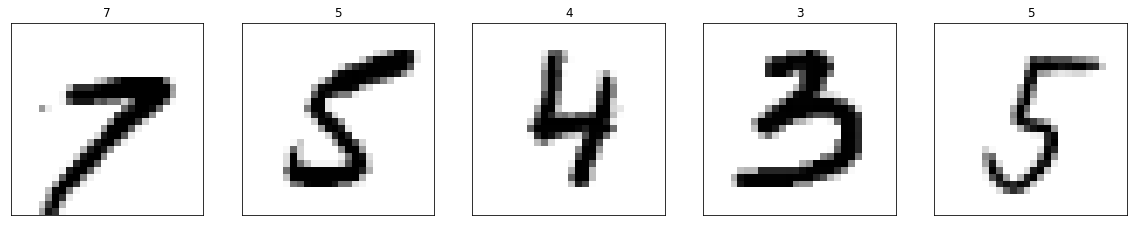

In [4]:
show_examples(X_train[10:15], Y_train[10:15],classes=get_mnist_labels())

# Basic Architecture: Layer sizes and MaxPool figuring
- I believe 32 will be best, 64 is too many for Mnist and 16 too little

## Architecture 1 [x]

- Rejected since many kernels in initial layer are dead

In [5]:

model = Sequential()

 
model.add(Convolution2D(64, 3, 3, activation='relu', input_shape=(28,28,1))) # 26
model.add(Convolution2D(16, 1, activation='relu'))
model.add(Convolution2D(16, 3,3, activation='relu')) # 24
model.add(MaxPooling2D(pool_size=(2, 2))) # 12
model.add(Convolution2D(16, 3,3, activation='relu')) # 10
model.add(Convolution2D(32, 3,3, activation='relu')) # 8
model.add(Convolution2D(16, 1, activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2))) #4
model.add(Convolution2D(10, 4,4))



model.add(Flatten())
model.add(Activation('softmax'))
print("Params = ",model.count_params())

model.compile(loss='categorical_crossentropy',
             optimizer="adam",
             metrics=['accuracy'])

train_history = model.fit(X_train, Y_train, batch_size=2048, epochs=10, verbose=0, shuffle=True, validation_split=0.1)
print("Layer Names: ",[layer.name for layer in model.layers[0:]])
val_metrics = (train_history.history['val_loss'][-1],train_history.history['val_acc'][-1])
print("Validation Loss",val_metrics)

_=evaluate(model,X_train, Y_train,classes=get_mnist_labels(),print_results=True, plot_results=False)
_=evaluate(model,X_test, Y_test,classes=get_mnist_labels(),print_results=True, plot_results=False)


Instructions for updating:
Colocations handled automatically by placer.
Params =  14058
Instructions for updating:
Use tf.cast instead.
Layer Names:  ['conv2d_1', 'conv2d_2', 'conv2d_3', 'max_pooling2d_1', 'conv2d_4', 'conv2d_5', 'conv2d_6', 'max_pooling2d_2', 'conv2d_7', 'flatten_1', 'activation_1']
Validation Loss (0.07959768535693487, 0.9759999957084656)
 =-=  =-=  =-=  =-=  =-=  =-=  =-=  =-=  =-=  =-=  =-=  =-=  =-=  =-=  =-=  =-=  =-=  =-=  =-=  =-= 
Total Model Params =  14058
Score =  [0.07794049080715826, 0.9767833333333333]
Balanced Accuracy = 97.67% 
 =-=  =-=  =-=  =-=  =-=  =-=  =-=  =-=  =-=  =-=  =-=  =-=  =-=  =-=  =-=  =-=  =-=  =-=  =-=  =-= 
Total Model Params =  14058
Score =  [0.0714306340072304, 0.9783]
Balanced Accuracy = 97.82% 


Compute filters 0 to 64
Costs of filter   0:     5 ( 0.55s )
Costs of filter   1:     3 ( 0.55s )
Costs of filter   2:     4 ( 0.55s )
Costs of filter   3:     3 ( 0.57s )
Costs of filter   4:     2 ( 0.58s )
Costs of filter   5:     8 ( 0.57s )
Costs of filter   6:     9 ( 0.58s )
Costs of filter   7:     2 ( 0.56s )
Costs of filter   8:     2 ( 0.59s )
Costs of filter   9:     3 ( 0.57s )
Costs of filter  10:     8 ( 0.72s )
Costs of filter  11:     1 ( 0.58s )
Costs of filter  12:     6 ( 0.58s )
Costs of filter  13:     2 ( 0.59s )
Costs of filter  14:     2 ( 0.59s )
Costs of filter  15:     0 ( 0.59s )
Costs of filter  16:     3 ( 0.65s )
Costs of filter  17:     6 ( 0.60s )
Costs of filter  18:     3 ( 0.62s )
Costs of filter  19:     1 ( 0.59s )
Costs of filter  20:     6 ( 0.61s )
Costs of filter  21:     2 ( 0.62s )
Costs of filter  22:     2 ( 0.59s )
Costs of filter  23:     2 ( 0.61s )
Costs of filter  24:     6 ( 0.60s )
Costs of filter  25:     6 ( 0.62s )
Costs of filte

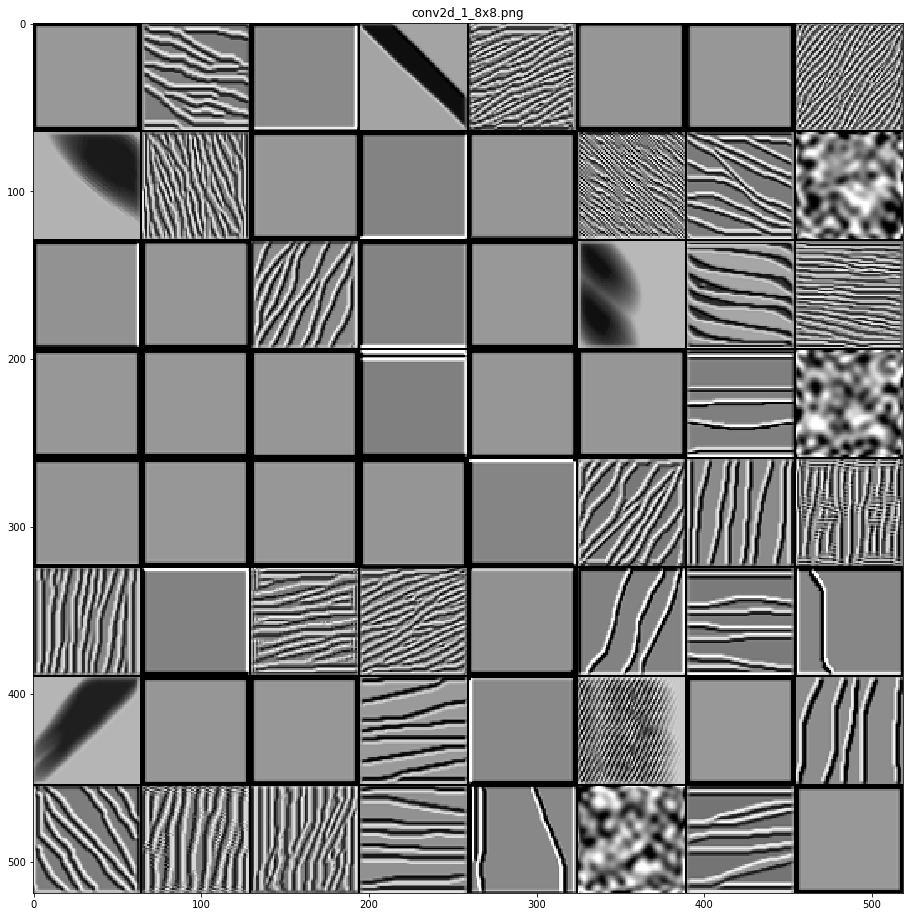

In [7]:

visualize_layer(model,"conv2d_1",filter_range=(0,64),upscaling_steps=20,
                    upscaling_factor=1.05,
                    output_dim=(64, 64))

Notice how multiple filters are blank, That tells us that 64 is too much. About 26 kernels are active rest are useless. Lets try 16 and 32 in 1st layer

## Architecture 2 [x]

- Too many params
- We followed ideas of where to put Transition layers of 1x1.
- Transition Layers empirically showed they do well if placed before MAxPool

In [63]:

model = Sequential()

 
model.add(Convolution2D(16, 3, 3, activation='relu', input_shape=(28,28,1))) # 26
model.add(Convolution2D(32, 3,3, activation='relu')) # 24
model.add(Convolution2D(10, 1, activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2))) # 12

model.add(Convolution2D(16, 3,3, activation='relu')) # 10
model.add(Convolution2D(10, 1, activation='relu'))
model.add(Convolution2D(16, 3,3, activation='relu')) # 8
model.add(Convolution2D(16, 3,3, activation='relu')) # 6
model.add(Convolution2D(10, 1, activation='relu'))
model.add(Convolution2D(10, 6,6))



model.add(Flatten())
model.add(Activation('softmax'))
print("Params = ",model.count_params())

model.compile(loss='categorical_crossentropy',
             optimizer="adam",
             metrics=['accuracy'])

train_history = model.fit(X_train, Y_train, batch_size=2048, epochs=10, verbose=0, shuffle=True, validation_split=0.1)
print("Layer Names: ",[layer.name for layer in model.layers[0:]])
val_metrics = (train_history.history['val_loss'][-1],train_history.history['val_acc'][-1])
print("Validation Loss",val_metrics)

_=evaluate(model,X_train, Y_train,classes=get_mnist_labels(),print_results=True, plot_results=False)
_=evaluate(model,X_test, Y_test,classes=get_mnist_labels(),print_results=True, plot_results=False)


Params =  14312
Layer Names:  ['conv2d_364', 'conv2d_365', 'conv2d_366', 'max_pooling2d_18', 'conv2d_367', 'conv2d_368', 'conv2d_369', 'conv2d_370', 'conv2d_371', 'conv2d_372', 'flatten_48', 'activation_48']
Validation Loss (0.11129218077659607, 0.9681666603088379)
 =-=  =-=  =-=  =-=  =-=  =-=  =-=  =-=  =-=  =-=  =-=  =-=  =-=  =-=  =-=  =-=  =-=  =-=  =-=  =-= 
Total Model Params =  14312
Score =  [0.09841268743450443, 0.9710166666666666]
Balanced Accuracy = 97.08% 
 =-=  =-=  =-=  =-=  =-=  =-=  =-=  =-=  =-=  =-=  =-=  =-=  =-=  =-=  =-=  =-=  =-=  =-=  =-=  =-= 
Total Model Params =  14312
Score =  [0.08623066967353225, 0.9735]
Balanced Accuracy = 97.32% 


Compute filters 0 to 32
Costs of filter   0:    14 ( 4.48s )
Costs of filter   1:    10 ( 4.65s )
Costs of filter   2:     4 ( 4.68s )
Costs of filter   3:     8 ( 4.68s )
Costs of filter   4:    11 ( 4.80s )
Costs of filter   5:    24 ( 5.04s )
Costs of filter   6:     5 ( 5.02s )
Costs of filter   7:    12 ( 4.86s )
Costs of filter   8:    22 ( 4.85s )
Costs of filter   9:    16 ( 4.67s )
Costs of filter  10:    18 ( 4.73s )
Costs of filter  11:    19 ( 4.64s )
Costs of filter  12:     6 ( 4.70s )
Costs of filter  13:    16 ( 4.68s )
Costs of filter  14:     5 ( 4.72s )
Costs of filter  15:    11 ( 4.73s )
Costs of filter  16:     7 ( 4.71s )
Costs of filter  17:    13 ( 4.71s )
Costs of filter  18:    13 ( 4.73s )
Costs of filter  19:     3 ( 4.81s )
Costs of filter  20:     5 ( 4.71s )
Costs of filter  21:     7 ( 4.94s )
Costs of filter  22:     9 ( 5.11s )
Costs of filter  23:    18 ( 4.91s )
Costs of filter  24:    20 ( 4.71s )
Costs of filter  25:     6 ( 4.75s )
Costs of filte

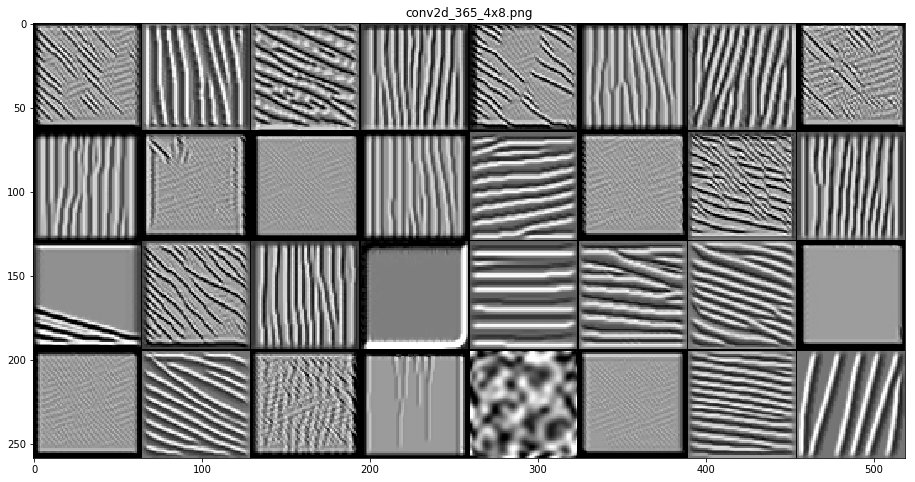

In [64]:
visualize_layer(model,"conv2d_365",filter_range=(0,32),upscaling_steps=20,
                    upscaling_factor=1.05,
                    output_dim=(64, 64),step=0.5,epochs=20)

Even 16-32 seems still more for this task as lots of filters stay dead. We still take it as with next improvements like dropout we may see these filters working.

## Architecture 3 [Selected]

We tried 32 in 1st layer and then noticed that many of these kernels were empty. So we will use dropout to add more robustness

In [88]:
model = Sequential()
model.add(Convolution2D(32, 3, 3, activation='relu', input_shape=(28,28,1))) # 26
model.add(Convolution2D(10, 1, activation='relu'))
model.add(Convolution2D(16, 3,3, activation='relu')) # 24
model.add(MaxPooling2D(pool_size=(2, 2))) #12

model.add(Convolution2D(16, 3,3, activation='relu')) # 10
model.add(Convolution2D(16, 3,3, activation='relu')) # 8
model.add(Convolution2D(16, 3,3, activation='relu')) #6
model.add(Convolution2D(10, 1, activation='relu')) #6
model.add(Convolution2D(10, 6,6))

model.add(Flatten())
model.add(Activation('softmax'))
print("Params = ",model.count_params())


model.compile(loss='categorical_crossentropy',
             optimizer="adam",
             metrics=['accuracy'])

train_history = model.fit(X_train, Y_train, batch_size=2048, epochs=10, verbose=0, shuffle=True, validation_split=0.1)
print("Layer Names: ",[layer.name for layer in model.layers[0:]])
val_metrics = (train_history.history['val_loss'][-1],train_history.history['val_acc'][-1])
print("Validation Loss",val_metrics)

_=evaluate(model,X_train, Y_train,classes=get_mnist_labels(),print_results=True, plot_results=False)
_=evaluate(model,X_test, Y_test,classes=get_mnist_labels(),print_results=True, plot_results=False)


Params =  12846
Layer Names:  ['conv2d_519', 'conv2d_520', 'conv2d_521', 'max_pooling2d_29', 'conv2d_522', 'conv2d_523', 'conv2d_524', 'conv2d_525', 'conv2d_526', 'flatten_68', 'activation_68']
Validation Loss (0.11358365686734517, 0.9658333400090535)
 =-=  =-=  =-=  =-=  =-=  =-=  =-=  =-=  =-=  =-=  =-=  =-=  =-=  =-=  =-=  =-=  =-=  =-=  =-=  =-= 
Total Model Params =  12846
Score =  [0.0949201194126159, 0.9709333333333333]
Balanced Accuracy = 97.09% 
 =-=  =-=  =-=  =-=  =-=  =-=  =-=  =-=  =-=  =-=  =-=  =-=  =-=  =-=  =-=  =-=  =-=  =-=  =-=  =-= 
Total Model Params =  12846
Score =  [0.08322237487956881, 0.973]
Balanced Accuracy = 97.30% 


Compute filters 0 to 32
Costs of filter   0:     9 ( 5.24s )
Costs of filter   1:     3 ( 5.15s )
Costs of filter   2:     3 ( 5.17s )
Costs of filter   3:     3 ( 5.16s )
Costs of filter   4:     7 ( 5.36s )
Costs of filter   5:    10 ( 5.49s )
Costs of filter   6:     0 ( 5.22s )
Costs of filter   7:     2 ( 5.18s )
Costs of filter   8:     2 ( 5.15s )
Costs of filter   9:     3 ( 5.17s )
Costs of filter  10:     2 ( 5.12s )
Costs of filter  11:     3 ( 5.13s )
Costs of filter  12:     4 ( 5.20s )
Costs of filter  13:     8 ( 5.15s )
Costs of filter  14:     8 ( 5.13s )
Costs of filter  15:    10 ( 5.21s )
Costs of filter  16:     4 ( 5.53s )
Costs of filter  17:     2 ( 5.23s )
Costs of filter  18:     8 ( 5.18s )
Costs of filter  19:     9 ( 5.23s )
Costs of filter  20:    12 ( 5.53s )
Costs of filter  21:     5 ( 5.38s )
Costs of filter  22:     1 ( 5.14s )
Costs of filter  23:     3 ( 5.21s )
Costs of filter  24:     0 ( 5.23s )
Costs of filter  25:     3 ( 5.16s )
Costs of filte

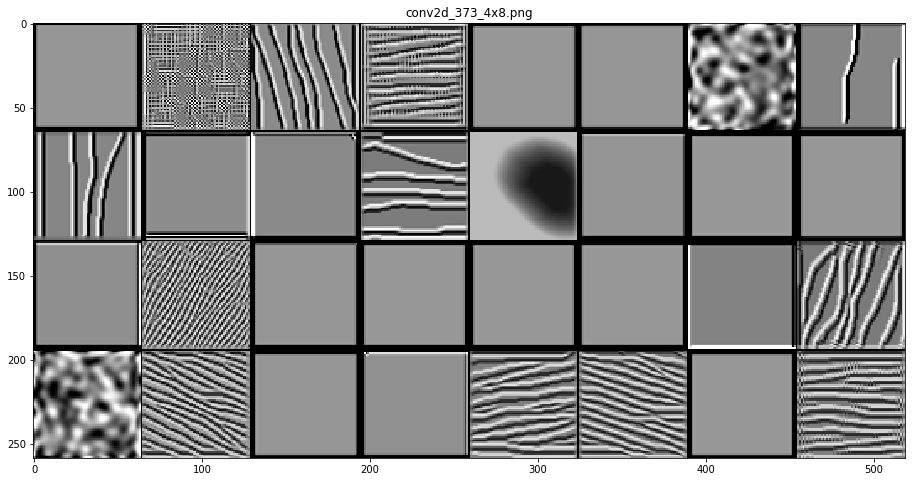

In [66]:
visualize_layer(model,"conv2d_373",filter_range=(0,32),upscaling_steps=20,
                    upscaling_factor=1.05,
                    output_dim=(64, 64))

From our experiments it seems 16 and 32 is more than enough for 1st layer. Lets try 8 though.

## Architecture 4 [Selected]
- 8->16 architecture
- Low number of Params

In [89]:

model = Sequential()

 
model.add(Convolution2D(8, 3, 3, activation='relu', input_shape=(28,28,1))) # 26
model.add(Convolution2D(16, 3,3, activation='relu')) # 24
model.add(MaxPooling2D(pool_size=(2, 2))) # 12
model.add(Convolution2D(8, 3,3, activation='relu')) # 10
model.add(Convolution2D(16, 3,3, activation='relu')) # 8
model.add(Convolution2D(10, 1, activation='relu'))
model.add(Convolution2D(16, 3,3, activation='relu')) # 6
model.add(Convolution2D(10, 6,6))



model.add(Flatten())
model.add(Activation('softmax'))
print("Params = ",model.count_params())

model.compile(loss='categorical_crossentropy',
             optimizer="adam",
             metrics=['accuracy'])

train_history = model.fit(X_train, Y_train, batch_size=2048, epochs=10, verbose=0, shuffle=True, validation_split=0.1)
print("Layer Names: ",[layer.name for layer in model.layers[0:]])
val_metrics = (train_history.history['val_loss'][-1],train_history.history['val_acc'][-1])
print("Validation Loss",val_metrics)

_=evaluate(model,X_train, Y_train,classes=get_mnist_labels(),print_results=True, plot_results=False)
_=evaluate(model,X_test, Y_test,classes=get_mnist_labels(),print_results=True, plot_results=False)


Params =  10972
Layer Names:  ['conv2d_527', 'conv2d_528', 'max_pooling2d_30', 'conv2d_529', 'conv2d_530', 'conv2d_531', 'conv2d_532', 'conv2d_533', 'flatten_69', 'activation_69']
Validation Loss (0.11221829990545909, 0.9655000066757202)
 =-=  =-=  =-=  =-=  =-=  =-=  =-=  =-=  =-=  =-=  =-=  =-=  =-=  =-=  =-=  =-=  =-=  =-=  =-=  =-= 
Total Model Params =  10972
Score =  [0.09994338895641268, 0.96985]
Balanced Accuracy = 96.96% 
 =-=  =-=  =-=  =-=  =-=  =-=  =-=  =-=  =-=  =-=  =-=  =-=  =-=  =-=  =-=  =-=  =-=  =-=  =-=  =-= 
Total Model Params =  10972
Score =  [0.08756132290363312, 0.9731]
Balanced Accuracy = 97.28% 


Compute filters 0 to 8
Costs of filter   0:     4 ( 5.59s )
Costs of filter   1:     4 ( 5.91s )
Costs of filter   2:    12 ( 6.25s )
Costs of filter   3:     9 ( 6.23s )
Costs of filter   4:    14 ( 5.92s )
Costs of filter   5:     4 ( 5.87s )
Costs of filter   6:     6 ( 5.96s )
Costs of filter   7:     9 ( 5.91s )
8 filter processed.
Filter Losses
 [3.7305198, 4.170247, 12.176837, 9.482343, 13.504718, 4.474886, 5.5848117, 9.459666]


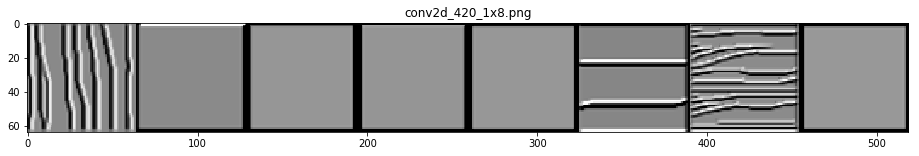

In [73]:
visualize_layer(model,"conv2d_420",filter_range=(0,8),upscaling_steps=20,
                    upscaling_factor=1.05,
                    output_dim=(64, 64))

Compute filters 0 to 16
Costs of filter   0:    53 ( 5.09s )
Costs of filter   1:   141 ( 5.63s )
Costs of filter   2:    78 ( 5.80s )
Costs of filter   3:   161 ( 5.97s )
Costs of filter   4:    45 ( 5.62s )
Costs of filter   5:   244 ( 5.58s )
Costs of filter   6:   139 ( 5.57s )
Costs of filter   7:   196 ( 5.59s )
Costs of filter   8:   133 ( 5.60s )
Costs of filter   9:    83 ( 5.62s )
Costs of filter  10:   289 ( 5.62s )
Costs of filter  11:   111 ( 5.66s )
Costs of filter  12:   146 ( 5.65s )
Costs of filter  13:   107 ( 5.62s )
Costs of filter  14:   106 ( 5.72s )
Costs of filter  15:   243 ( 5.73s )
16 filter processed.
Filter Losses
 [53.09387, 141.07877, 78.18883, 161.15994, 44.640453, 243.78383, 139.11044, 195.906, 132.89543, 82.85475, 289.19708, 110.8554, 145.92236, 107.4877, 106.0952, 243.15155]


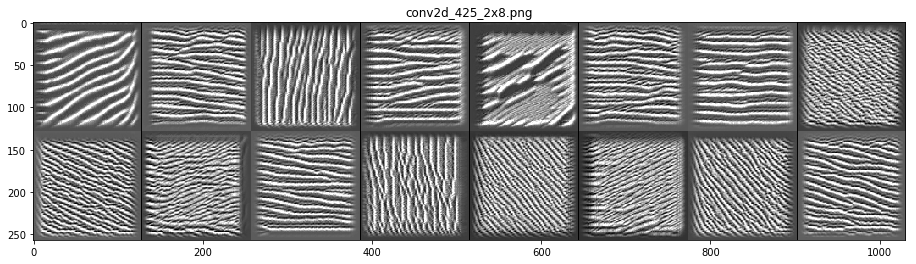

In [75]:
visualize_layer(model,"conv2d_425",filter_range=(0,16),upscaling_steps=10,
                    upscaling_factor=1.1,
                    output_dim=(128, 128),image_size_multiplier=2)

## Architecture 5 [Selected]

- Underfit
- Less params

In [90]:
model = Sequential()
model.add(Convolution2D(8, 3, 3, activation='relu', input_shape=(28,28,1))) # 26
model.add(Convolution2D(16, 3,3, activation='relu')) # 24

model.add(MaxPooling2D(pool_size=(2, 2))) #12
model.add(Convolution2D(10, 1, activation='relu'))

model.add(Convolution2D(16, 3,3, activation='relu')) # 10
model.add(Convolution2D(16, 3,3, activation='relu')) # 8
model.add(Convolution2D(10, 1, activation='relu')) #8
model.add(Convolution2D(10, 8,8))

model.add(Flatten())
model.add(Activation('softmax'))
print("Params = ",model.count_params())


model.compile(loss='categorical_crossentropy',
             optimizer="adam",
             metrics=['accuracy'])

train_history = model.fit(X_train, Y_train, batch_size=2048, epochs=10, verbose=0, shuffle=True, validation_split=0.1)
print("Layer Names: ",[layer.name for layer in model.layers[0:]])
val_metrics = (train_history.history['val_loss'][-1],train_history.history['val_acc'][-1])
print("Validation Loss",val_metrics)

_=evaluate(model,X_train, Y_train,classes=get_mnist_labels(),print_results=True, plot_results=False)
_=evaluate(model,X_test, Y_test,classes=get_mnist_labels(),print_results=True, plot_results=False)


Params =  11774
Layer Names:  ['conv2d_534', 'conv2d_535', 'max_pooling2d_31', 'conv2d_536', 'conv2d_537', 'conv2d_538', 'conv2d_539', 'conv2d_540', 'flatten_70', 'activation_70']
Validation Loss (0.10388186689217885, 0.9685000030199686)
 =-=  =-=  =-=  =-=  =-=  =-=  =-=  =-=  =-=  =-=  =-=  =-=  =-=  =-=  =-=  =-=  =-=  =-=  =-=  =-= 
Total Model Params =  11774
Score =  [0.09497019084716836, 0.9716333333333333]
Balanced Accuracy = 97.16% 
 =-=  =-=  =-=  =-=  =-=  =-=  =-=  =-=  =-=  =-=  =-=  =-=  =-=  =-=  =-=  =-=  =-=  =-=  =-=  =-= 
Total Model Params =  11774
Score =  [0.0836603551954031, 0.9737]
Balanced Accuracy = 97.37% 


# Strides = 2, Instead of MaxPool
- Seemingly no advantage.
- With Similar Params both perform the same, Compare Arch 5 & 6

## Architecture 6 [x]
- No too many params 
- No advantage

In [83]:
model = Sequential()

 
model.add(Convolution2D(8, 3, 3, activation='relu', input_shape=(28,28,1))) # 26
model.add(Convolution2D(16, 3,3, activation='relu')) # 24

model.add(Convolution2D(16, (3,3),strides=2, activation='relu'))
model.add(Convolution2D(16, 1, activation='relu'))

model.add(Convolution2D(16, 3,3, activation='relu')) # 10
model.add(Convolution2D(16, 3,3, activation='relu')) # 8
model.add(Convolution2D(10, 1, activation='relu')) #8
model.add(Convolution2D(10, 7,7))

model.add(Flatten())
model.add(Activation('softmax'))
print("Params = ",model.count_params())


model.compile(loss='categorical_crossentropy',
             optimizer="adam",
             metrics=['accuracy'])

train_history = model.fit(X_train, Y_train, batch_size=2048, epochs=10, verbose=0, shuffle=True, validation_split=0.1)
print("Layer Names: ",[layer.name for layer in model.layers[0:]])
val_metrics = (train_history.history['val_loss'][-1],train_history.history['val_acc'][-1])
print("Validation Loss",val_metrics)

_=evaluate(model,X_train, Y_train,classes=get_mnist_labels(),print_results=True, plot_results=False)
_=evaluate(model,X_test, Y_test,classes=get_mnist_labels(),print_results=True, plot_results=False)


Params =  13560
Layer Names:  ['conv2d_481', 'conv2d_482', 'conv2d_483', 'conv2d_484', 'conv2d_485', 'conv2d_486', 'conv2d_487', 'conv2d_488', 'flatten_63', 'activation_63']
Validation Loss (0.10924739050865173, 0.9656666757265727)
 =-=  =-=  =-=  =-=  =-=  =-=  =-=  =-=  =-=  =-=  =-=  =-=  =-=  =-=  =-=  =-=  =-=  =-=  =-=  =-= 
Total Model Params =  13560
Score =  [0.09181411099620164, 0.973]
Balanced Accuracy = 97.30% 
 =-=  =-=  =-=  =-=  =-=  =-=  =-=  =-=  =-=  =-=  =-=  =-=  =-=  =-=  =-=  =-=  =-=  =-=  =-=  =-= 
Total Model Params =  13560
Score =  [0.08311682940013707, 0.9738]
Balanced Accuracy = 97.37% 


## Architecture 7 [x]
- Too many params
- No comparative advantage

In [80]:

model = Sequential()

 
model.add(Convolution2D(16, 3, 3, activation='relu', input_shape=(28,28,1))) # 26
model.add(Convolution2D(16, 3,3, activation='relu')) # 24
model.add(Convolution2D(32, (3,3), strides=2, activation='relu')) #11
model.add(Convolution2D(8, 1, activation='relu'))
model.add(Convolution2D(8, 3,3, activation='relu')) # 10
model.add(Convolution2D(16, 3,3, activation='relu')) # 8
model.add(Convolution2D(8, 1, activation='relu'))
model.add(Convolution2D(16, 3,3, activation='relu')) # 6
model.add(Convolution2D(10, 5,5))



model.add(Flatten())
model.add(Activation('softmax'))
print("Params = ",model.count_params())

model.compile(loss='categorical_crossentropy',
             optimizer="adam",
             metrics=['accuracy'])

train_history = model.fit(X_train, Y_train, batch_size=2048, epochs=10, verbose=0, shuffle=True, validation_split=0.1)
print("Layer Names: ",[layer.name for layer in model.layers[0:]])
val_metrics = (train_history.history['val_loss'][-1],train_history.history['val_acc'][-1])
print("Validation Loss",val_metrics)

_=evaluate(model,X_train, Y_train,classes=get_mnist_labels(),print_results=True, plot_results=False)
_=evaluate(model,X_test, Y_test,classes=get_mnist_labels(),print_results=True, plot_results=False)


Params =  14450
Layer Names:  ['conv2d_456', 'conv2d_457', 'conv2d_458', 'conv2d_459', 'conv2d_460', 'conv2d_461', 'conv2d_462', 'conv2d_463', 'conv2d_464', 'flatten_60', 'activation_60']
Validation Loss (0.11108186705907186, 0.9643333412806193)
 =-=  =-=  =-=  =-=  =-=  =-=  =-=  =-=  =-=  =-=  =-=  =-=  =-=  =-=  =-=  =-=  =-=  =-=  =-=  =-= 
Total Model Params =  14450
Score =  [0.09557145535610616, 0.9706833333333333]
Balanced Accuracy = 97.04% 
 =-=  =-=  =-=  =-=  =-=  =-=  =-=  =-=  =-=  =-=  =-=  =-=  =-=  =-=  =-=  =-=  =-=  =-=  =-=  =-= 
Total Model Params =  14450
Score =  [0.09126024884134532, 0.9722]
Balanced Accuracy = 97.19% 


Compute filters 0 to 16
Costs of filter   0:     4 ( 0.86s )
Costs of filter   1:    78 ( 0.94s )
Costs of filter   2:    71 ( 0.91s )
Costs of filter   3:    70 ( 0.97s )
Costs of filter   4:     0 ( 0.97s )
Costs of filter   5:    11 ( 0.96s )
Costs of filter   6:    33 ( 0.99s )
Costs of filter   7:     8 ( 0.96s )
Costs of filter   8:    21 ( 0.98s )
Costs of filter   9:    14 ( 0.97s )
Costs of filter  10:    48 ( 1.01s )
Costs of filter  11:    30 ( 0.98s )
Costs of filter  12:    50 ( 1.02s )
Costs of filter  13:     8 ( 0.99s )
Costs of filter  14:    42 ( 1.05s )
Costs of filter  15:     8 ( 0.99s )
16 filter processed.
Filter Losses
 [3.870583, 77.58838, 70.8044, 69.550896, 0.0, 11.118435, 32.708336, 7.8599834, 20.966816, 14.316649, 47.79082, 29.917519, 50.19258, 7.870231, 42.09, 7.8303127]


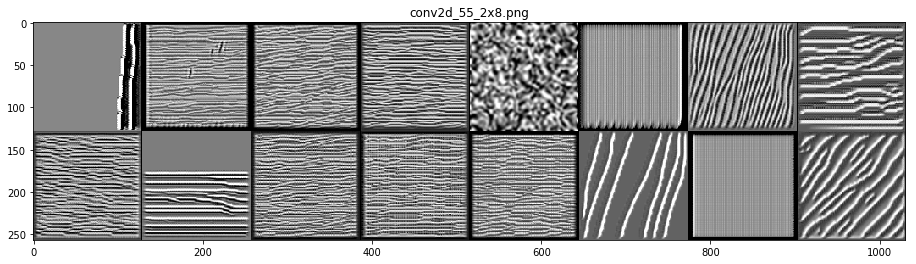

In [18]:
visualize_layer(model,"conv2d_55",filter_range=(0,16),upscaling_steps=10,
                    upscaling_factor=1.1,
                    output_dim=(128, 128),image_size_multiplier=2)

## Architecture 8 [x]
- We intend to have around 7k params, this still has 10k so we reject this one.

In [84]:
model = Sequential()
 
model.add(Convolution2D(8, 3, 3, activation='relu', input_shape=(28,28,1))) # 26
model.add(Convolution2D(16, 3,3, activation='relu')) # 24
model.add(Convolution2D(16, (3,3),strides=2, activation='relu'))
model.add(Convolution2D(8, 1, activation='relu'))
model.add(Convolution2D(16, 3,3, activation='relu')) # 10
model.add(Convolution2D(16, (3,3),strides=2, activation='relu')) # 8
model.add(Convolution2D(16, 1, activation='relu')) #4
model.add(Convolution2D(10, 4,4))

model.add(Flatten())
model.add(Activation('softmax'))
print("Params = ",model.count_params())


model.compile(loss='categorical_crossentropy',
             optimizer="adam",
             metrics=['accuracy'])

train_history = model.fit(X_train, Y_train, batch_size=2048, epochs=10, verbose=0, shuffle=True, validation_split=0.1)
print("Layer Names: ",[layer.name for layer in model.layers[0:]])
val_metrics = (train_history.history['val_loss'][-1],train_history.history['val_acc'][-1])
print("Validation Loss",val_metrics)

_=evaluate(model,X_train, Y_train,classes=get_mnist_labels(),print_results=True, plot_results=False)
_=evaluate(model,X_test, Y_test,classes=get_mnist_labels(),print_results=True, plot_results=False)


Params =  10034
Layer Names:  ['conv2d_489', 'conv2d_490', 'conv2d_491', 'conv2d_492', 'conv2d_493', 'conv2d_494', 'conv2d_495', 'conv2d_496', 'flatten_64', 'activation_64']
Validation Loss (0.10796865876515706, 0.9683333365122477)
 =-=  =-=  =-=  =-=  =-=  =-=  =-=  =-=  =-=  =-=  =-=  =-=  =-=  =-=  =-=  =-=  =-=  =-=  =-=  =-= 
Total Model Params =  10034
Score =  [0.09570886853331079, 0.97175]
Balanced Accuracy = 97.16% 
 =-=  =-=  =-=  =-=  =-=  =-=  =-=  =-=  =-=  =-=  =-=  =-=  =-=  =-=  =-=  =-=  =-=  =-=  =-=  =-= 
Total Model Params =  10034
Score =  [0.0865617283925414, 0.9725]
Balanced Accuracy = 97.23% 


## Architecture 9 [Selected]
- 7k params
- last layer is 5x5
- Underfit

In [86]:
model = Sequential()
model.add(Convolution2D(8, 3, 3, activation='relu', input_shape=(28,28,1))) # 26
model.add(Convolution2D(8, (3,3), activation='relu')) # 24
model.add(Convolution2D(16, (3,3), strides=2, activation='relu')) # 11
model.add(Convolution2D(16, 1, activation='relu'))
model.add(Convolution2D(16, (3,3), strides=2, activation='relu')) #5
model.add(Convolution2D(10, 1, activation='relu')) #3
model.add(Convolution2D(10, 5,5))

model.add(Flatten())
model.add(Activation('softmax'))
print("Params = ",model.count_params())


model.compile(loss='categorical_crossentropy',
             optimizer="adam",
             metrics=['accuracy'])

train_history = model.fit(X_train, Y_train, batch_size=2048, epochs=10, verbose=0, shuffle=True, validation_split=0.1)
print("Layer Names: ",[layer.name for layer in model.layers[0:]])
val_metrics = (train_history.history['val_loss'][-1],train_history.history['val_acc'][-1])
print("Validation Loss",val_metrics)

_=evaluate(model,X_train, Y_train,classes=get_mnist_labels(),print_results=True, plot_results=False)
_=evaluate(model,X_test, Y_test,classes=get_mnist_labels(),print_results=True, plot_results=False)


Params =  7104
Layer Names:  ['conv2d_504', 'conv2d_505', 'conv2d_506', 'conv2d_507', 'conv2d_508', 'conv2d_509', 'conv2d_510', 'flatten_66', 'activation_66']
Validation Loss (0.13447353820006053, 0.9608333412806193)
 =-=  =-=  =-=  =-=  =-=  =-=  =-=  =-=  =-=  =-=  =-=  =-=  =-=  =-=  =-=  =-=  =-=  =-=  =-=  =-= 
Total Model Params =  7104
Score =  [0.12065197658364972, 0.9646833333333333]
Balanced Accuracy = 96.45% 
 =-=  =-=  =-=  =-=  =-=  =-=  =-=  =-=  =-=  =-=  =-=  =-=  =-=  =-=  =-=  =-=  =-=  =-=  =-=  =-= 
Total Model Params =  7104
Score =  [0.10994624311327934, 0.967]
Balanced Accuracy = 96.68% 


## Architecture 10 [x]
- Bad performance

In [49]:
model = Sequential()
model.add(Convolution2D(8, (3, 3), strides=2, activation='relu', input_shape=(28,28,1))) #13
model.add(Convolution2D(8, (3,3), activation='relu')) #11
model.add(Convolution2D(16, 1, activation='relu')) #11
model.add(Convolution2D(16, (3,3), strides=2, activation='relu')) #5
model.add(Convolution2D(10, 1, activation='relu')) #5
model.add(Convolution2D(10, 5,5))

model.add(Flatten())
model.add(Activation('softmax'))
print("Params = ",model.count_params())


model.compile(loss='categorical_crossentropy',
             optimizer="adam",
             metrics=['accuracy'])

train_history = model.fit(X_train, Y_train, batch_size=2048, epochs=10, verbose=0, shuffle=True, validation_split=0.1)
print("Layer Names: ",[layer.name for layer in model.layers[0:]])
val_metrics = (train_history.history['val_loss'][-1],train_history.history['val_acc'][-1])
print("Validation Loss",val_metrics)

_=evaluate(model,X_train, Y_train,classes=get_mnist_labels(),print_results=True, plot_results=False)
_=evaluate(model,X_test, Y_test,classes=get_mnist_labels(),print_results=True, plot_results=False)


Params =  5808
Layer Names:  ['conv2d_267', 'conv2d_268', 'conv2d_269', 'conv2d_270', 'conv2d_271', 'conv2d_272', 'flatten_34', 'activation_34']
Validation Loss (0.17872872559229533, 0.9488333320617676)
 =-=  =-=  =-=  =-=  =-=  =-=  =-=  =-=  =-=  =-=  =-=  =-=  =-=  =-=  =-=  =-=  =-=  =-=  =-=  =-= 
Total Model Params =  5808
Score =  [0.16065137864003579, 0.9524333333333334]
Balanced Accuracy = 95.20% 
 =-=  =-=  =-=  =-=  =-=  =-=  =-=  =-=  =-=  =-=  =-=  =-=  =-=  =-=  =-=  =-=  =-=  =-=  =-=  =-= 
Total Model Params =  5808
Score =  [0.1508681193113327, 0.9567]
Balanced Accuracy = 95.65% 


## Architecture 11  [x]
- Bad Performance


In [55]:
model = Sequential()
model.add(Convolution2D(8, (3, 3), strides=2, activation='relu', input_shape=(28,28,1))) #13
model.add(Convolution2D(16, (3,3), strides=2, activation='relu')) #6
model.add(Convolution2D(16, (3,3), activation='relu')) #4
model.add(Convolution2D(16, 1, activation='relu')) #4
model.add(Convolution2D(10, 4,4))

model.add(Flatten())
model.add(Activation('softmax'))
print("Params = ",model.count_params())


model.compile(loss='categorical_crossentropy',
             optimizer="adam",
             metrics=['accuracy'])

train_history = model.fit(X_train, Y_train, batch_size=2048, epochs=10, verbose=0, shuffle=True, validation_split=0.1)
print("Layer Names: ",[layer.name for layer in model.layers[0:]])
val_metrics = (train_history.history['val_loss'][-1],train_history.history['val_acc'][-1])
print("Validation Loss",val_metrics)

_=evaluate(model,X_train, Y_train,classes=get_mnist_labels(),print_results=True, plot_results=False)
_=evaluate(model,X_test, Y_test,classes=get_mnist_labels(),print_results=True, plot_results=False)


Params =  6410
Layer Names:  ['conv2d_296', 'conv2d_297', 'conv2d_298', 'conv2d_299', 'conv2d_300', 'flatten_40', 'activation_40']
Validation Loss (0.2015232563416163, 0.9390000025431315)
 =-=  =-=  =-=  =-=  =-=  =-=  =-=  =-=  =-=  =-=  =-=  =-=  =-=  =-=  =-=  =-=  =-=  =-=  =-=  =-= 
Total Model Params =  6410
Score =  [0.17900324108302593, 0.9462]
Balanced Accuracy = 94.56% 
 =-=  =-=  =-=  =-=  =-=  =-=  =-=  =-=  =-=  =-=  =-=  =-=  =-=  =-=  =-=  =-=  =-=  =-=  =-=  =-= 
Total Model Params =  6410
Score =  [0.16501134085059166, 0.9504]
Balanced Accuracy = 94.98% 


## Architecture 12 [Selected]
- Only 6k params
- uses strides instead of MaxPool twice
- Acceptable performance

In [87]:
model = Sequential()
model.add(Convolution2D(16, 3, 3, activation='relu', input_shape=(28,28,1))) # 26
model.add(Convolution2D(8, 1, activation='relu'))
model.add(Convolution2D(8, (3,3), activation='relu')) # 24
model.add(Convolution2D(16, (3,3), strides=2, activation='relu')) # 11
model.add(Convolution2D(8, 1, activation='relu'))
model.add(Convolution2D(16, (3,3), strides=2, activation='relu')) #5
model.add(Convolution2D(10, 1, activation='relu')) #3
model.add(Convolution2D(10, 5,5))

model.add(Flatten())
model.add(Activation('softmax'))
print("Params = ",model.count_params())


model.compile(loss='categorical_crossentropy',
             optimizer="adam",
             metrics=['accuracy'])

train_history = model.fit(X_train, Y_train, batch_size=2048, epochs=10, verbose=0, shuffle=True, validation_split=0.1)
print("Layer Names: ",[layer.name for layer in model.layers[0:]])
val_metrics = (train_history.history['val_loss'][-1],train_history.history['val_acc'][-1])
print("Validation Loss",val_metrics)

_=evaluate(model,X_train, Y_train,classes=get_mnist_labels(),print_results=True, plot_results=False)
_=evaluate(model,X_test, Y_test,classes=get_mnist_labels(),print_results=True, plot_results=False)


Params =  6032
Layer Names:  ['conv2d_511', 'conv2d_512', 'conv2d_513', 'conv2d_514', 'conv2d_515', 'conv2d_516', 'conv2d_517', 'conv2d_518', 'flatten_67', 'activation_67']
Validation Loss (0.13986052556832632, 0.9585000020662944)
 =-=  =-=  =-=  =-=  =-=  =-=  =-=  =-=  =-=  =-=  =-=  =-=  =-=  =-=  =-=  =-=  =-=  =-=  =-=  =-= 
Total Model Params =  6032
Score =  [0.12751386830334863, 0.9617833333333333]
Balanced Accuracy = 96.15% 
 =-=  =-=  =-=  =-=  =-=  =-=  =-=  =-=  =-=  =-=  =-=  =-=  =-=  =-=  =-=  =-=  =-=  =-=  =-=  =-= 
Total Model Params =  6032
Score =  [0.12194633073806763, 0.9638]
Balanced Accuracy = 96.36% 


# Misc Code

In [6]:
K.epsilon()

1e-07

In [0]:
layer = model.layers[0]
weights = layer.get_weights()[0]
len(weights)
weights.shape
print()
weights[:,:,:,0]

In [23]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_74 (Conv2D)           (None, 26, 26, 64)        640       
_________________________________________________________________
conv2d_75 (Conv2D)           (None, 26, 26, 16)        1040      
_________________________________________________________________
conv2d_76 (Conv2D)           (None, 24, 24, 16)        2320      
_________________________________________________________________
conv2d_77 (Conv2D)           (None, 22, 22, 16)        2320      
_________________________________________________________________
max_pooling2d_11 (MaxPooling (None, 11, 11, 16)        0         
_________________________________________________________________
conv2d_78 (Conv2D)           (None, 9, 9, 16)          2320      
_________________________________________________________________
conv2d_79 (Conv2D)           (None, 7, 7, 32)          4640      
__________

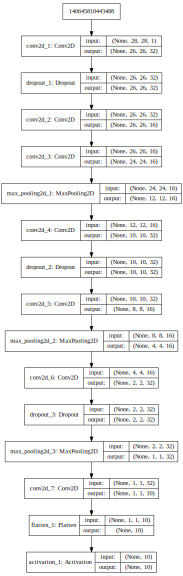

In [0]:
from IPython.display import SVG
from keras.utils.vis_utils import model_to_dot

m2d = model_to_dot(model, show_shapes=True,)
m2d.set_size('8x18')
SVG(m2d.create(prog='dot', format='svg'))